<a href="https://colab.research.google.com/github/Aditya-11/Eron-Email-Analysis/blob/master/enron_graph_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)




In [0]:
link = "https://drive.google.com/open?id=17w1lY_KjMPCqV6JWS1iZ_v8cRYGHpmLN"
id = '17w1lY_KjMPCqV6JWS1iZ_v8cRYGHpmLN'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('extracted_data (1).csv')  
df3 = pd.read_csv('extracted_data (1).csv')

In [4]:
import datetime
df3 = df3[df3['Date'].notnull()]
df3['Date'] = df3['Date'].map(lambda x: '-'.join(x.split('-')[:3]))
df3["Date"] = df3['Date'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
print(df3["Date"])

0         2001-05-14 16:39:00
1         2001-05-04 13:51:00
2         2000-10-18 03:00:00
3         2000-10-23 06:13:00
4         2000-08-31 05:07:00
                 ...         
517396    2001-11-28 13:30:11
517397    2001-11-28 12:47:48
517398    2001-11-28 07:20:00
517399    2001-11-27 11:52:45
517400    2001-11-26 10:48:43
Name: Date, Length: 517401, dtype: object


In [0]:
def req_data():
  d1 = datetime.datetime(2000,1, 1)
  d2 = datetime.datetime(2000, 12, 31)
  mask = (df3['Date'] > d1) & (df3['Date'] <= d2)
  df1 = df3.loc[mask]

  d1 = datetime.datetime(2001,1, 1)
  d2 = datetime.datetime(2001, 12, 31)
  mask = (df3['Date'] > d1) & (df3['Date'] <= d2)
  df2 = df3.loc[mask]

  d1 = datetime.datetime(2002,1, 1)
  d2 = datetime.datetime(2002, 12, 31)
  mask = (df3['Date'] > d1) & (df3['Date'] <= d2)
  df4 = df3.loc[mask]

  return df1, df2, df4

In [0]:
df1,df2,df4 = req_data()



In [0]:
df2.head()

,Sender,Recipient 1,Recipient 2,Recipient 3,Subject,Date,Message body
0,phillip.allen,tim.belden,NaN,NaN,NaN,2001-05-14 16:39:00,Here is our forecast
1,phillip.allen,john.lavorato,NaN,NaN,NaN,2001-05-04 13:51:00,Traveling to have a business meeting takes the...
17,phillip.allen,tim.heizenrader,NaN,NaN,NaN,2001-05-04 11:26:00,"Tim,mike grigsby is having problems with acces..."
28,phillip.allen,rlehmann,NaN,NaN,NaN,2001-05-03 15:57:00,"Reagan,Just wanted to give you an update. I h..."
39,phillip.allen,james.steffes,NaN,NaN,NaN,2001-05-02 12:36:00,"Jim,Is there going to be a conference call or ..."


In [0]:
df4.head()

,Sender,Recipient 1,Recipient 2,Recipient 3,Subject,Date,Message body
2013,subscriptions,pallen,NaN,NaN,"NGI Publications - Tuesday, January 1st 2002",2002-01-01 14:34:36,"Dear phillip,This e-mail is automated notifica..."
2014,subscriptions,pallen,NaN,NaN,"NGI Publications - Wednesday, January 2nd 2002",2002-01-01 14:46:05,"Dear phillip,This e-mail is automated notifica..."
2015,arsystem,k..allen,NaN,NaN,Access Request for matt.smith@enron.com,2002-01-01 17:19:40,This request has been pending your approval fo...
6111,msagel,jarnold,NaN,NaN,Market update,2002-01-01 11:04:18,Cc: mmaggi@enron.comBcc: mmaggi@enron.comHappy...
8264,arsystem,harry.arora,NaN,NaN,Access Request for jaime.gualy@enron.com,2002-01-01 01:11:25,This request has been pending your approval fo...


In [7]:
df1 = df1[["Sender","Recipient 1","Subject","Date","Message body"]].sample(n= 1000)
df1.dropna()
df2 = df2[["Sender","Recipient 1","Subject","Date","Message body"]].sample(n= 1000)
df2.dropna()
df4 = df4[["Sender","Recipient 1","Subject","Date","Message body"]].sample(n= 1000)
df4.dropna()



,Sender,Recipient 1,Subject,Date,Message body
256308,tackleshop1,jeff.king,Cabin Fever Savings from eAngler!,2002-01-30 16:23:09,eAngler.com Cabin Fever Savings! Lo...
488241,gelliott,pcopello,Palo Verde 01 R7 Unplanned,2002-01-22 11:50:05,"Dear Power Outage Database Customer,Attached y..."
94700,dennis.lee,e-mail,Contracts/PLE On-Call Schedule,2002-03-13 12:47:35,"\trobert.benningfield@enron.com, larry.berger@..."
504434,paul.lewis,w..white,Global Estate Database,2002-01-07 06:54:23,"I will be out of the office until January 8, 2..."
291126,bungalowlife,emca,*EMCA* missing dog,2002-01-29 08:22:24,Sound is right...I heard him barking this mor...
...,...,...,...,...,...
113503,ronald.brzezinski,john.admire,Mill Run April Monthly availability report,2002-05-28 09:17:00,"Cc: val.artman@enron.com, mark.fisher@enron.co..."
504412,m.hall,c..gossett,Curve Validation Information,2002-01-07 14:49:31,\tw..white@enron.comCc: araceli.romero@enron.c...
52982,domestications,scorman,No Shipping Charges at Domestications.com,2002-01-22 13:22:04,A cure for the winter blues...FREE* SHIPPING @...
52852,info,scorman,"Power Markets 2002 April 17-18, Las Vegas",2002-02-28 09:40:52,<http://rs6.net/on.jsp?t=1010959240681.101094...


In [0]:
# df1 = df1[df1["Sender"].notnull()]
# df2 = df2[df2["Sender"].notnull()]
# df4 = df4[df4["Sender"].notnull()]

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.from_pandas_edgelist(df1, 'Sender',"Recipient 1")#, edge_attr = "Message body")
G2 = nx.from_pandas_edgelist(df2, 'Sender',"Recipient 1")#, edge_attr = "Message body")
G3 = nx.from_pandas_edgelist(df4, 'Sender',"Recipient 1")#, edge_attr = "Message body")

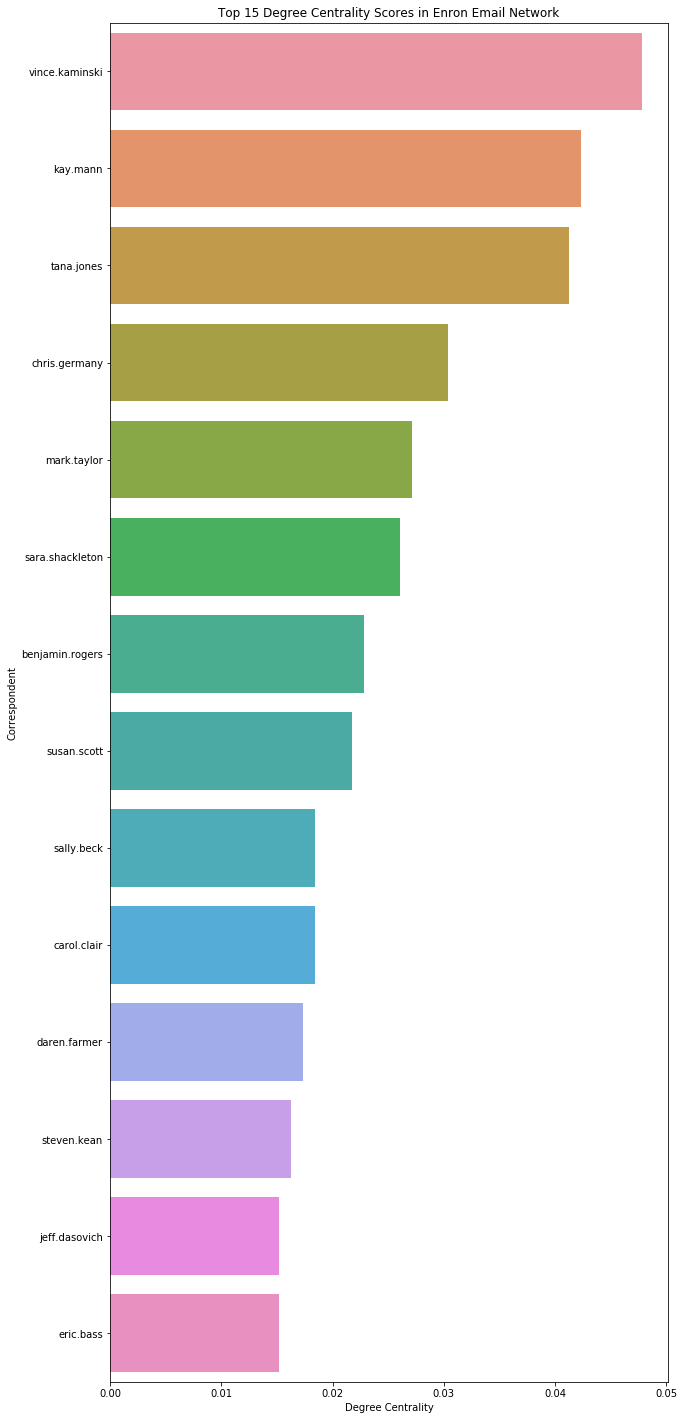

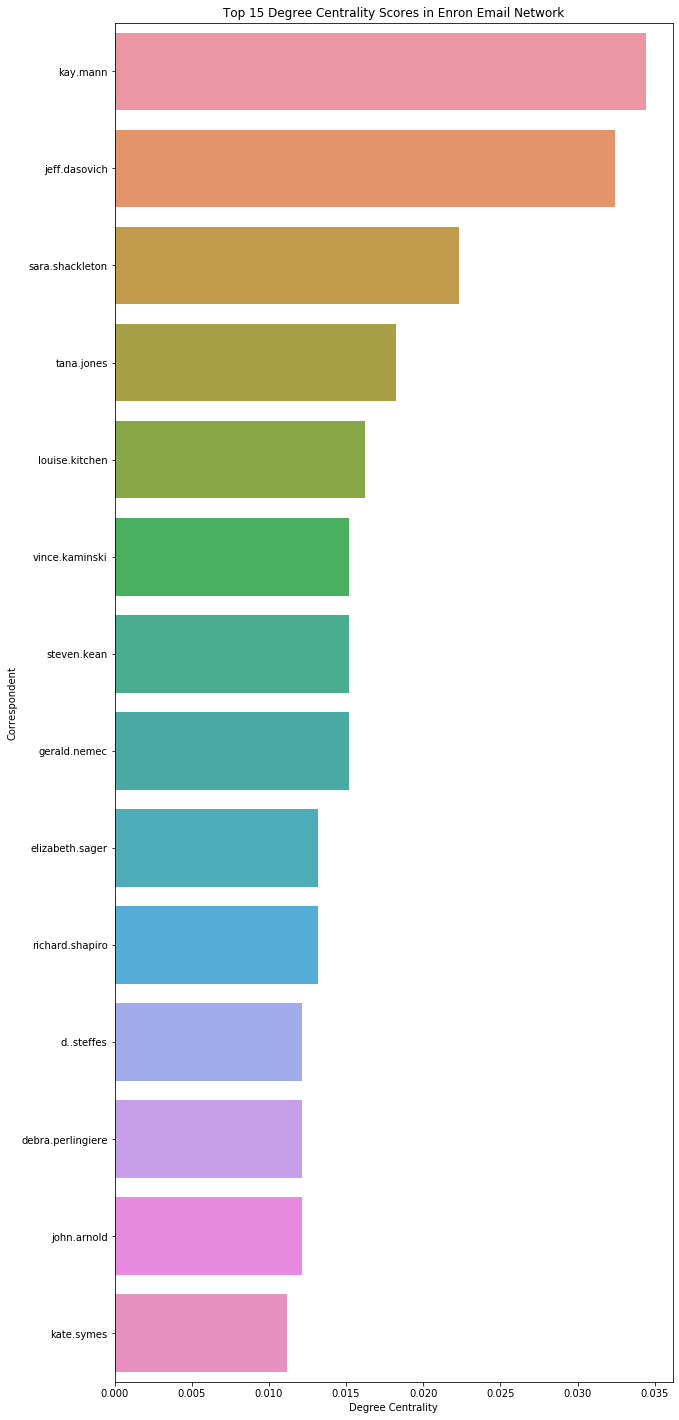

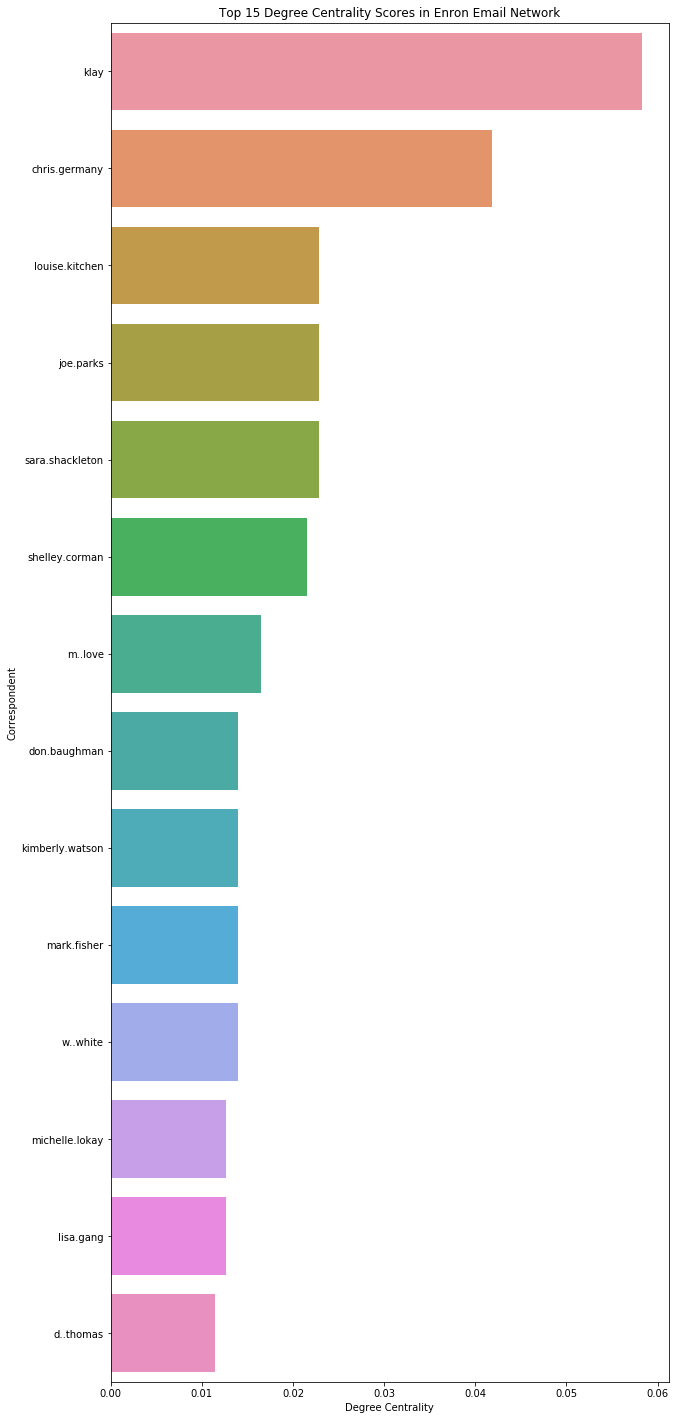

In [9]:

import seaborn as sns


def centrality_plot(G):
  cent = nx.degree_centrality(G)
  name = []
  centrality = []

  for key, value in cent.items():
      name.append(key)
      centrality.append(value)

  backup = nx.degree_centrality(G)

  cent = pd.DataFrame()    
  cent['name'] = name
  cent['centrality'] = centrality
  cent = cent.sort_values(by='centrality', ascending=False)

  plt.figure(figsize=(10, 25))
  _ = sns.barplot(x='centrality', y='name', data=cent[:15], orient='h')
  _ = plt.xlabel('Degree Centrality')
  _ = plt.ylabel('Correspondent')
  _ = plt.title('Top 15 Degree Centrality Scores in Enron Email Network')
  plt.show()

  return backup, cent[:15]


backup1,top1 = centrality_plot(G1)
backup2,top2 = centrality_plot(G2)
backup3,top3  = centrality_plot(G3)

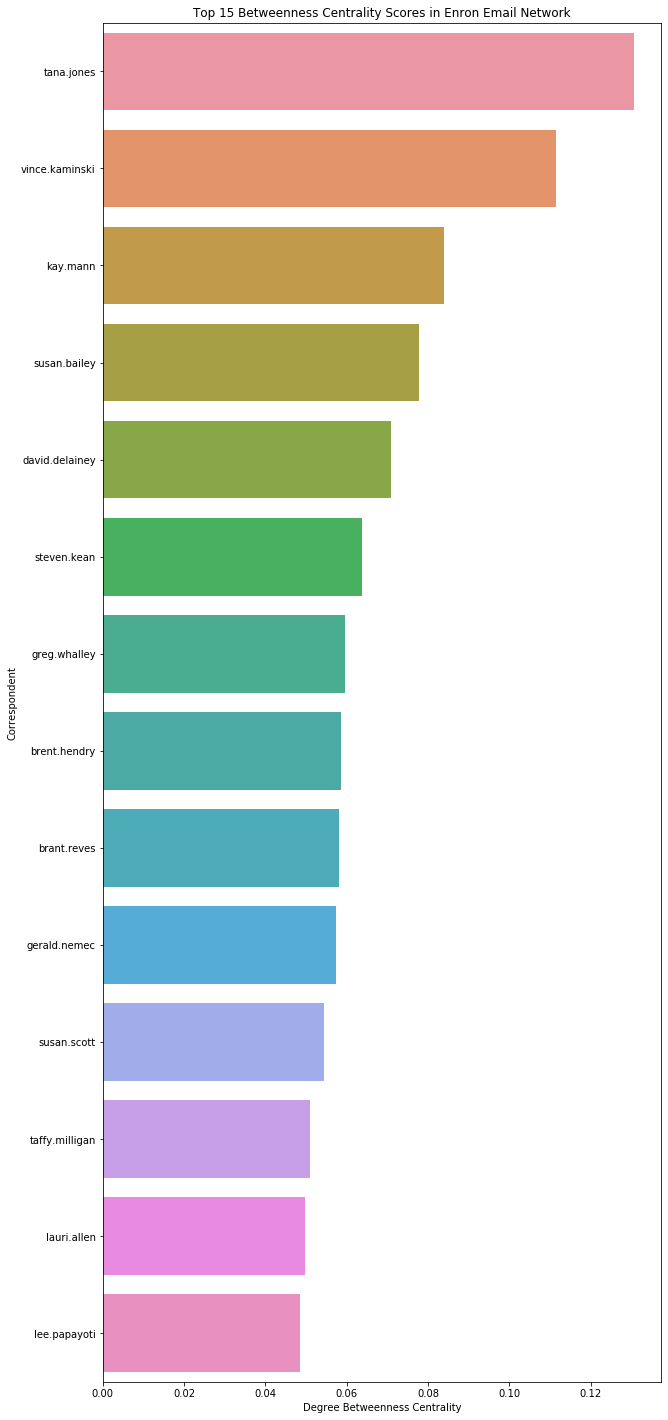

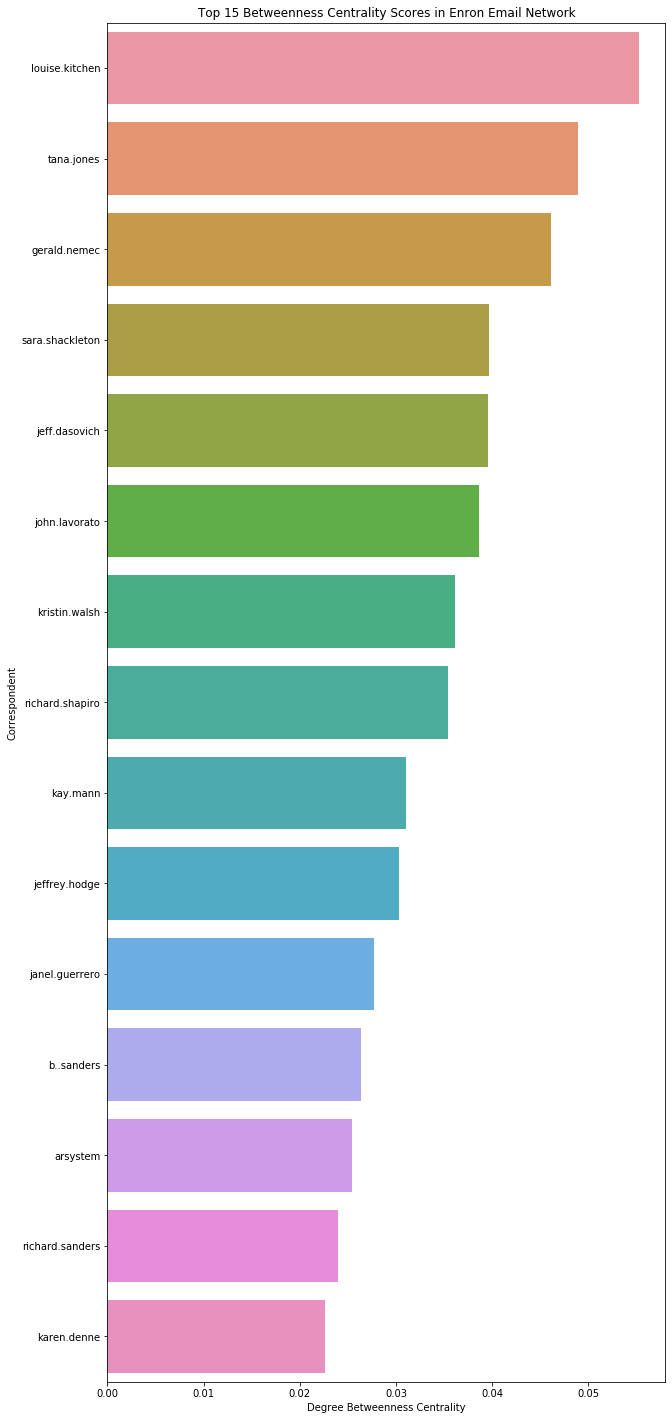

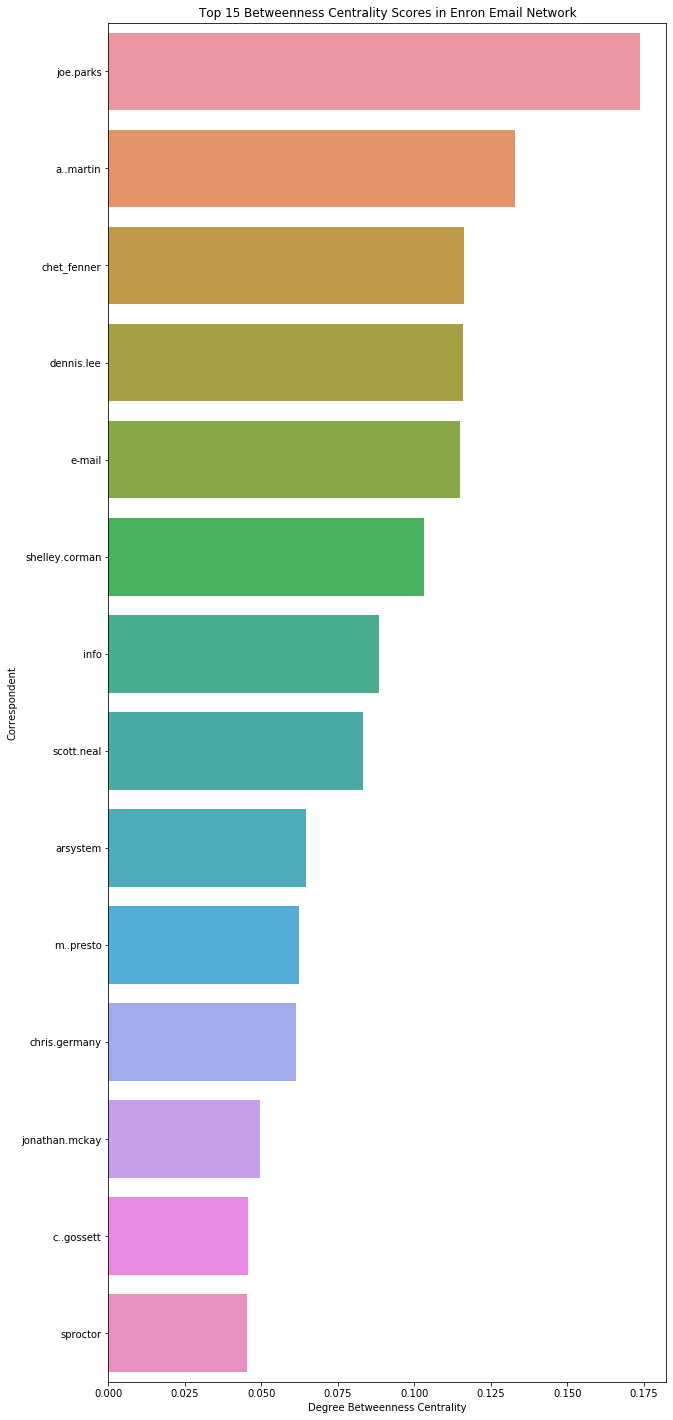

In [10]:
def betweenness(G):
  between = nx.betweenness_centrality(G)
  name = []
  betweenness = []

  for key, value in between.items():
      name.append(key)
      betweenness.append(value)

  bet = pd.DataFrame()
  bet['name'] = name
  bet['betweenness'] = betweenness
  bet = bet.sort_values(by='betweenness', ascending=False)


  plt.figure(figsize=(10, 25))
  _ = sns.barplot(x='betweenness', y='name', data=bet[:15], orient='h')
  _ = plt.xlabel('Degree Betweenness Centrality')
  _ = plt.ylabel('Correspondent')
  _ = plt.title('Top 15 Betweenness Centrality Scores in Enron Email Network')
  plt.show()

betweenness(G1)
betweenness(G2)
betweenness(G3)


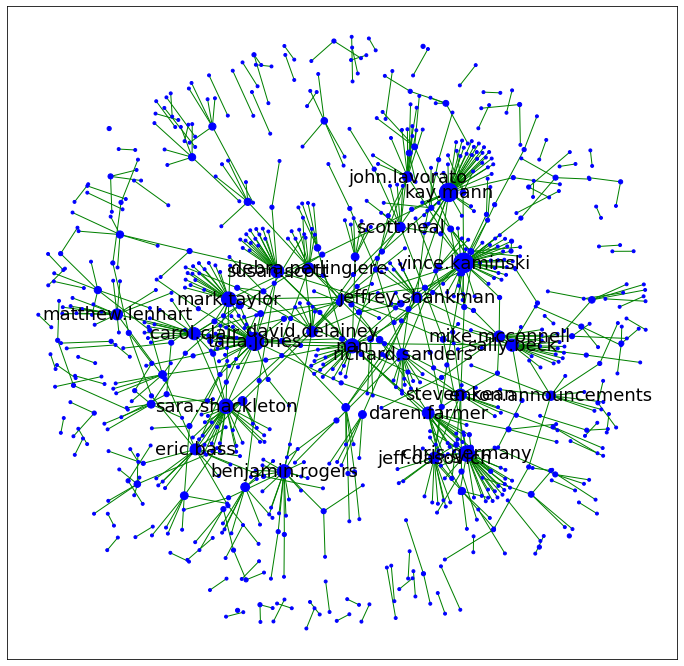

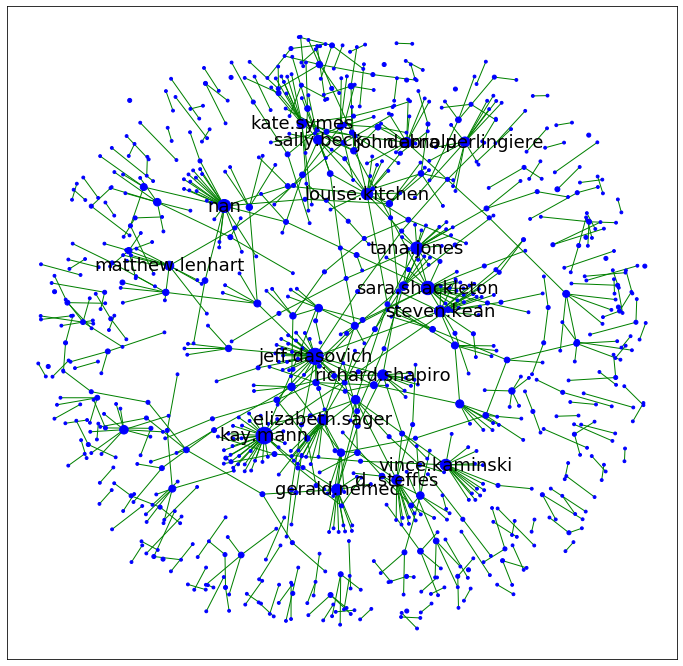

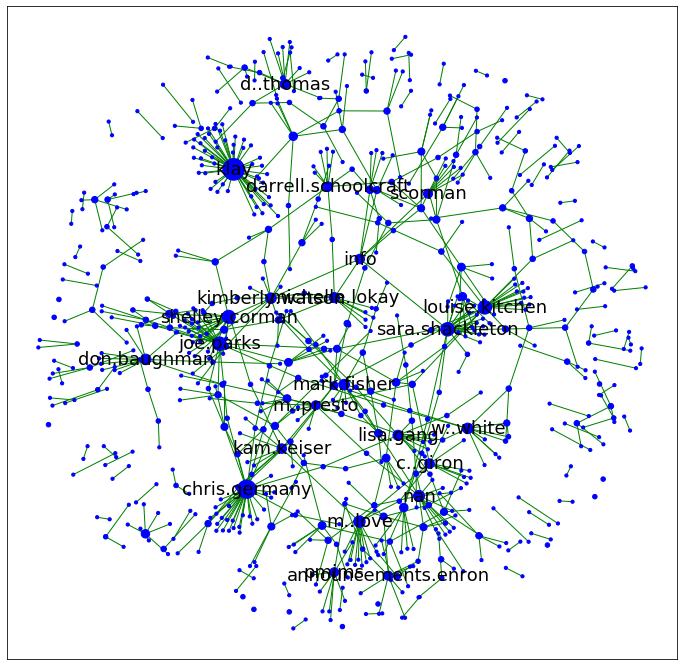

In [11]:
def mainGraph(G, backup):
  plt.figure(figsize=(12, 12))
  pos = nx.spring_layout(G, k=.1)

  labels = {}
  for node in G.nodes():
    if backup[node] >= 0.01:
        #set the node name as the key and the label as its value 
        labels[node] = node

  nx.draw_networkx(G, pos, nodelist=backup.keys(), node_size=[v * 8000 for v in backup.values()], node_color='blue', with_labels=False, edge_color='green')
  nx.draw_networkx_labels(G,pos,labels,font_size = 18, font_color='black')
  plt.show()

mainGraph(G1, backup1)
mainGraph(G2, backup2)
mainGraph(G3, backup3)

In [0]:
from textblob import TextBlob


In [13]:

def get_polarity(G, df):
  polarity = {}
  for edge in G.edges():
    filtered_df = df[(df["Sender"] == edge[0]) & (df["Recipient 1"] == edge[0])]
    if len(filtered_df) > 0:
      message = filtered_df.iloc[0,-1]
      blob = TextBlob(message)
      polarity[edge] = blob.sentiment.polarity
    else:
      polarity[edge] = 0

    print(polarity[edge])

  return polarity

p1 = get_polarity(G1,df1)
print(p1)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0.05651515151515151
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [14]:
p2 = get_polarity(G2,df2)
p3 = get_polarity(G3,df4)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0.10333333333333332
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


The mean: 0.016211925618549075


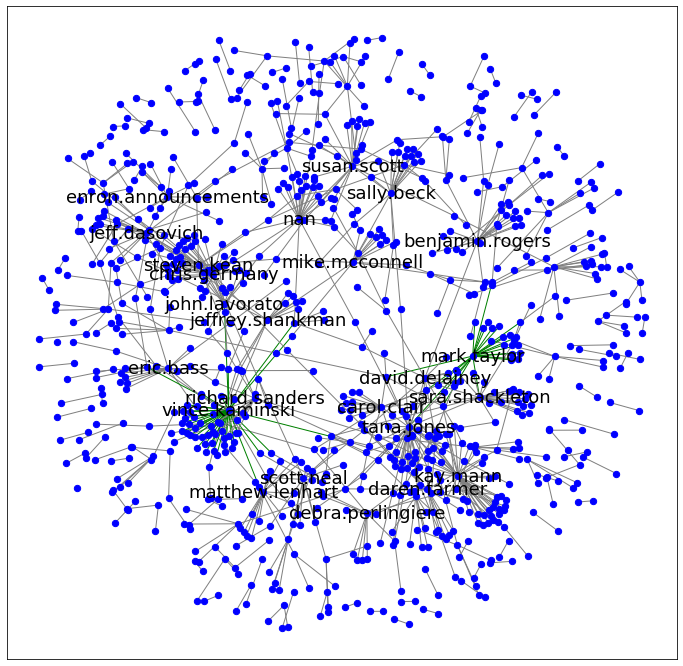

The mean: 0.0055564304659825115


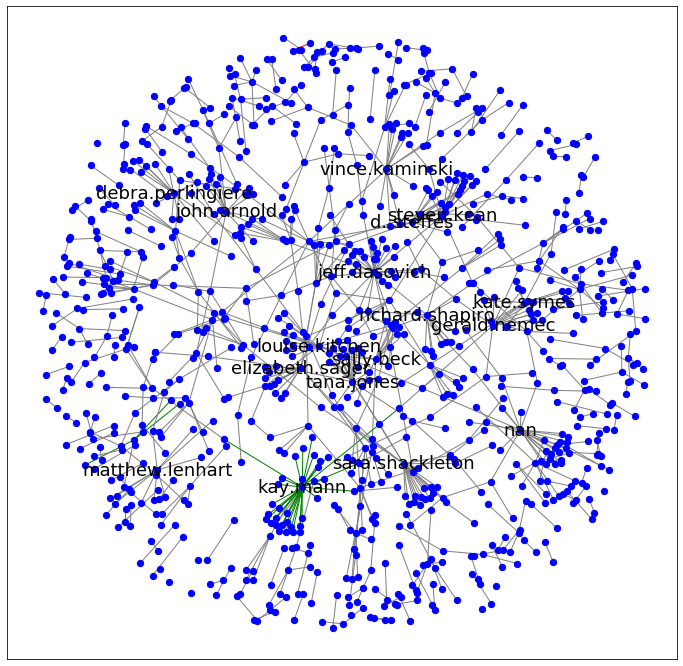

The mean: 0.004594056060969167


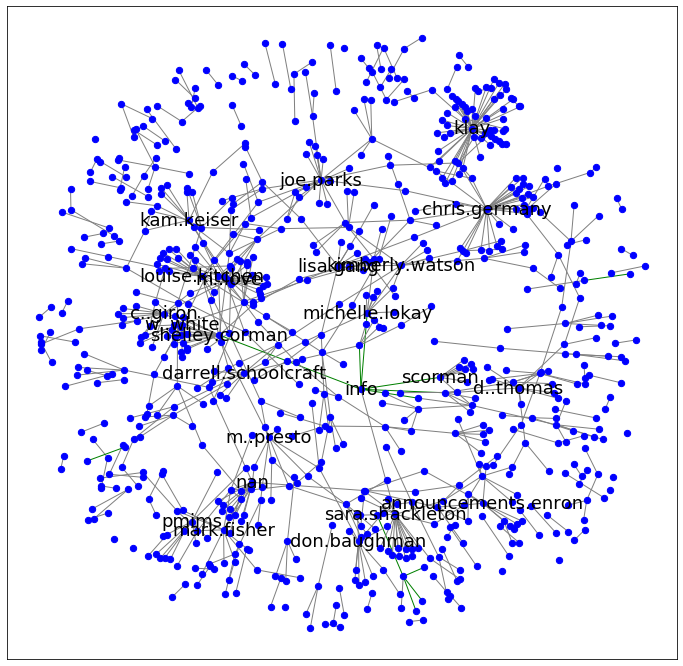

In [15]:
import numpy as np
def polarityGraph(G, polarity, backup):
  plt.figure(figsize=(12, 12))
  pos = nx.spring_layout(G, k=.1)

  labels = {}
  for node in G.nodes():
    if backup[node] > 0.01:
        #set the node name as the key and the label as its value 
        labels[node] = node

  colors = []
  polarities = np.array(list(polarity.values()))
  mu = np.mean(polarities)
  print("The mean: {}".format(mu))

  for edge in G.edges():
      if polarity[edge] > 0:
        #set the node name as the key and the label as its value 
        colors.append("green")
      elif polarity[edge] < 0:
        colors.append("red")
      else:
        colors.append('grey')
  nx.draw_networkx(G, pos, nodelist=backup.keys(), node_size=40, node_color="blue", with_labels=False, edge_color=colors)
  nx.draw_networkx_labels(G,pos,labels,font_size = 18, font_color='black')
  plt.show()

polarityGraph(G1, p1, backup1)
polarityGraph(G2, p2, backup2)
polarityGraph(G3, p3, backup3)

In [0]:
def get_subjectivity(G, df):
  subj = {}
  for edge in G.edges():
    filtered_df = df[(df["Sender"] == edge[0]) & (df["Recipient 1"] == edge[0])]
    if len(filtered_df) > 0:
      message = filtered_df.iloc[0,-1]
      blob = TextBlob(message)
      subj[edge] = blob.sentiment.subjectivity
    else:
      subj[edge] = 0

  return subj

g1 = get_subjectivity(G1,df1)
g2 = get_subjectivity(G2,df2)
g3 = get_subjectivity(G3,df4)

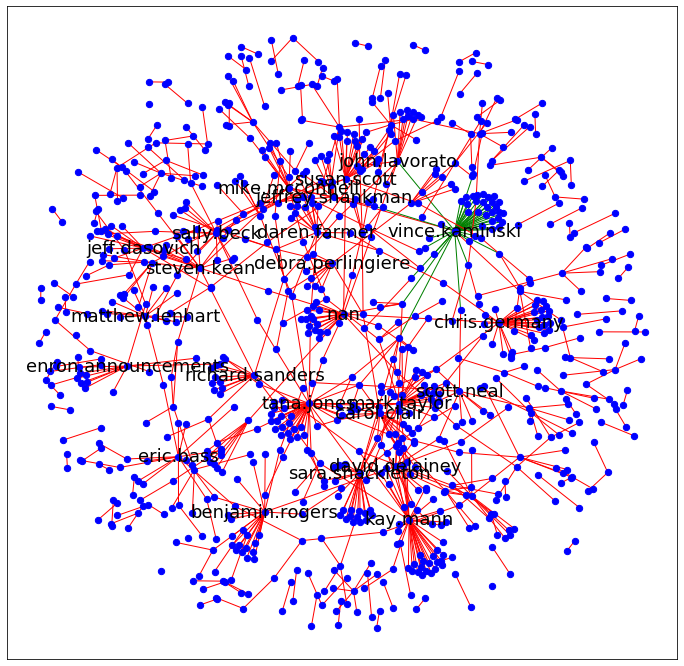

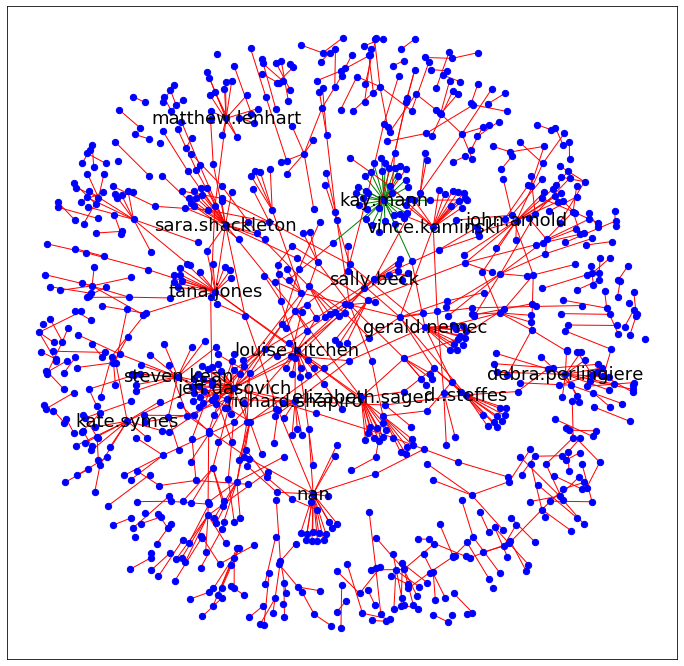

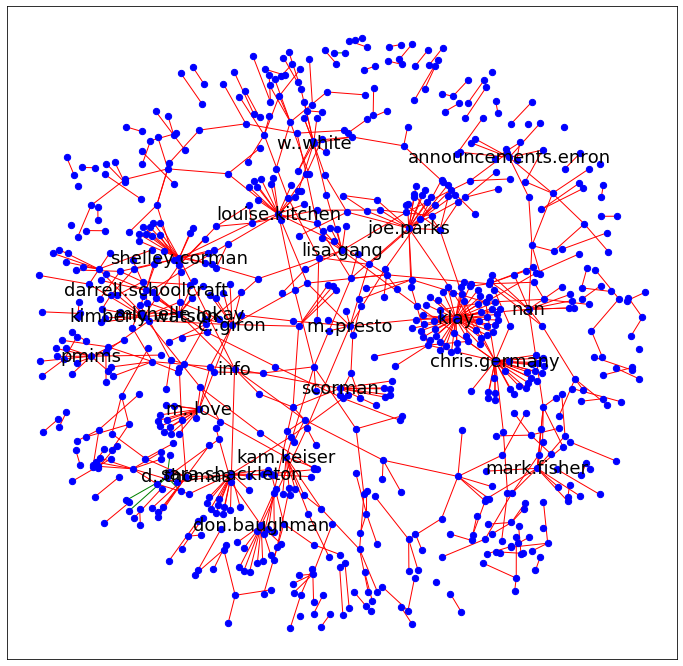

In [22]:
def subjectivityGraph(G, subjectivity, backup):
  plt.figure(figsize=(12, 12))
  pos = nx.spring_layout(G, k=.1)

  labels = {}
  for node in G.nodes():
    if backup[node] > 0.01:
        #set the node name as the key and the label as its value 
        labels[node] = node

  colors = []
  polarities = np.array(list(subjectivity.values()))

  for edge in G.edges():
      if subjectivity[edge] > 0.5:
        #set the node name as the key and the label as its value 
        colors.append("green")
      elif subjectivity[edge] < 0.5:
        colors.append("red")
      else:
        colors.append('grey')
  nx.draw_networkx(G, pos, nodelist=backup.keys(), node_size=40, node_color="blue", with_labels=False, edge_color=colors)
  nx.draw_networkx_labels(G,pos,labels,font_size = 18, font_color='black')
  plt.show()

subjectivityGraph(G1, g1, backup1)
subjectivityGraph(G2, g2, backup2)
subjectivityGraph(G3, g3, backup3)